In [1]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/HAM10000_metadata.csv")
print("Number of samples:", len(df))

/mnt/d/Forschung/Skin-Cancer-Diagnosis-CNN/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Resuming download from 3958374400 bytes (1624540111 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/kmader/skin-cancer-mnist-ham10000?dataset_version_number=2 (3958374400/5582914511) bytes left.


100%|██████████| 5.20G/5.20G [02:06<00:00, 12.8MB/s]

Extracting files...


Path to dataset files: /home/kesslermatics/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2
Number of samples: 10015


In [6]:
import os

# Bildpfad finden
def find_image_path(image_id, base_path):
    for sub in ["HAM10000_images_part_1", "HAM10000_images_part_2"]:
        full_path = os.path.join(base_path, sub, f"{image_id}.jpg")
        if os.path.exists(full_path):
            return full_path
    return None

# Neue Spalte mit Pfaden
df["file_path"] = df["image_id"].apply(lambda x: find_image_path(x, path))
df = df.dropna(subset=["file_path"])  # Entferne fehlende Bilder
print("Number of valid samples:", len(df))

Number of valid samples: 10015


In [7]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,file_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/kesslermatics/.cache/kagglehub/datasets/...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/kesslermatics/.cache/kagglehub/datasets/...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/kesslermatics/.cache/kagglehub/datasets/...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/kesslermatics/.cache/kagglehub/datasets/...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/kesslermatics/.cache/kagglehub/datasets/...


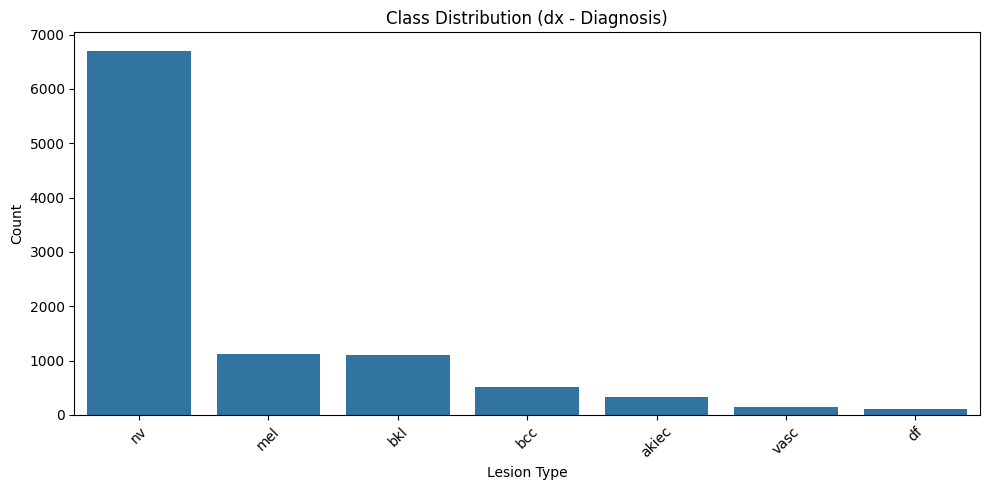

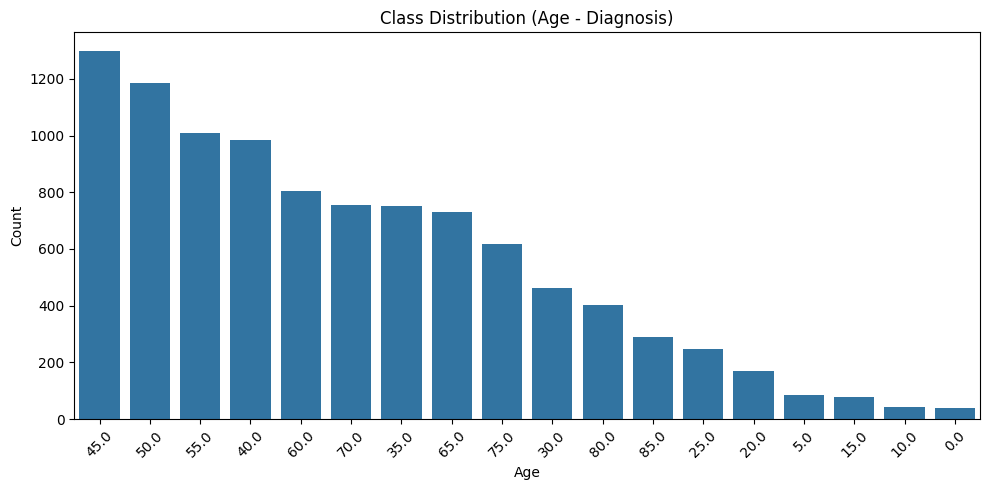

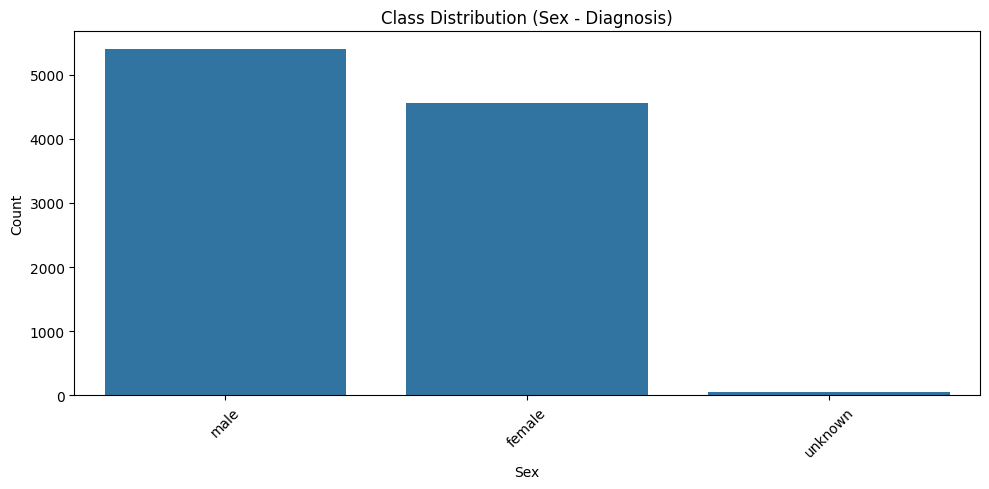

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="dx", order=df["dx"].value_counts().index)
plt.title("Class Distribution (dx - Diagnosis)")
plt.xlabel("Lesion Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/figures/lesion_distribution.png")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="age", order=df["age"].value_counts().index)
plt.title("Class Distribution (Age - Diagnosis)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/figures/age_distribution.png")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="sex", order=df["sex"].value_counts().index)
plt.title("Class Distribution (Sex - Diagnosis)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/figures/sex_distribution.png")
plt.show()
